<a href="https://colab.research.google.com/github/lahirurane/UTS_ML2019_A2/blob/master/UTS_ML2019_A2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2

##DATA ANALYTICS PROJECT

###**BUSINENESS PROBLEM**

E-commerce has boomed exponentially from 2014 to 2020 by 200%. With increase of sale, companies are able to reach customers globally. Companies started facing issues in handling customer complaint. The companies must analyse millions of feedback which is humanly impossible. The companies like Amazon, Flipkart started using Text analysis technique to analyse customer’s feedback. The technique helps to analyse feedbacks and find out whether customer are positive or negative about the products. It is critical to evaluate the customers’ reviews as it will decide the organizations’ business decision. That’s why, it is very critical to get customer feedback, clean it, analyse it and visualize it. The visualization should be in a way that non-technical professions can understand it. Once data is visualized, the organization can re-evaluate the business strategies. After changing the business strategies, again the engineer collects text data and runs through same cycle. By doing that, the company can continuously update the product based on customers’ negative feedback.

It is required to define the business before defining business problem. E-Commerce organization like Amazon, Flipkart sell products of all brands. Amazon sell their own Amazon certified products as well. On the website, it allows users to provide feedback. Based on the feedback, it improvise the products. Our aim in the report is to use sentiment analysis on customers’ feedback by working on data uploaded on Kaggle. We chose to work on text analysis as we have seen that by reviewing text analysis, small and medium companies have improved the service/product. It can be done for giant company like Amazon as well. The sentimental analysis will give big boost and eliminate the customer’s pain. Here, we are focusing on Amazon's Echo product. 

Definition of Sentimental Analysis: 

It is a method to analysis text data by converting in a data such that machine can understand the language and gives meaningful visualization. The visualization is then can be helpful for choosing the strategies.

Thus the problem statement is: 'Sentimental analysis on Amazon Product using data extracted Amazon feedback.' The statement is broken into sub-business problem as written below:



This analysis will help the business heads in analyzing customer's feeling for Amazon Echo. It can be useful when Amazon wants to launch same product with upgraded features, it will be helpful.



###DATA MINING PROBLEM

  Predictive Analysis, Machine Learning, Data Mining, and Big Data techniques have been adopted to analyse and classify the tweets.

In [0]:
from google.colab import files
from IPython.display import Image
Image('Framework.jpg', width =525)

The Data Analysis part comprises of two phases:


1.   Data Cleaning Phase: The data which we got from Kaggle (https://www.kaggle.com/sid321axn/amazon-alexa-reviews) has been cleaned. This part will be discussed in the report later.
2.   Predictive Analysis: To analyze and predict dataset accurately , we will make a model which helps us to visualize the data. The figure of the model is shown as below in the figure.



In [0]:
Image('Steps.png', width =525)

##'Python' Programming Language

It is an open source programming language, being used in industry for text/data analysis. We will be using Python through out the model. Next section, we will explain the codes. 

Below are the libraries being used:


1.   Pandas: Library is used for data read, write ,and manipulation.
2.   numpy: It is general purpose array processing package.
4.   Seaborn: Plotting a graph and visualization in the report.
5.   WordCloud: For displaying wordcloud in later part of the section




In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from nltk.tokenize import word_tokenize 
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score , confusion_matrix
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

In [0]:
!fusermount -u drive
!google-drive-ocamlfuse drive

fusermount: failed to unmount /gdrive/My Drive/datasets/drive: No such file or directory
/bin/bash: google-drive-ocamlfuse: command not found


In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/datasets

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/datasets


The above code will mount the Google Drive where the dataset extracted from Kaggle. It asks for authorization code. We need to click on the URL mentioned in the output and allow Colab to access Google Drive. Once authorization is given, copy the code and it will load the data in Colab.

Load Data

In [0]:
dataset = pd.read_csv('./amazon_alexa.tsv', delimiter='\t')
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [0]:
dataset['review_text_length'] = dataset.verified_reviews.apply(lambda x: len(x))

Function to remove patters from text.

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In the dataset, there are lots of noise like punctuations, numbers and special characters. It will decrease the accuracy of prediction. Some of the feedbacks are in Upper case and combination of upper and lower case. That will also lower the accuracy. That’s the reason we are converting the sentences in lower case. 

In [0]:
# remove special characters, numbers, punctuations
dataset['review_cleared_text'] = dataset['verified_reviews'].str.replace("[^a-zA-Z#]", " ")

In [0]:
dataset['review_cleared_text'] = dataset.review_cleared_text.apply(lambda x: x.lower())

In [0]:
print('The mean for the review comment text length:',dataset['review_text_length'].mean())
print('The standard deviation for the review comment text length:',dataset['review_text_length'].std())
print('The maximum for the review comment text length:',dataset['review_text_length'].max())
print('The minimum for the review comment text length:',dataset['review_text_length'].min())

The mean for the review comment text length: 132.0495238095238
The standard deviation for the review comment text length: 182.0999522038919
The maximum for the review comment text length: 2851
The minimum for the review comment text length: 1


Text(0.5, 1.0, 'Distribution of review text length')

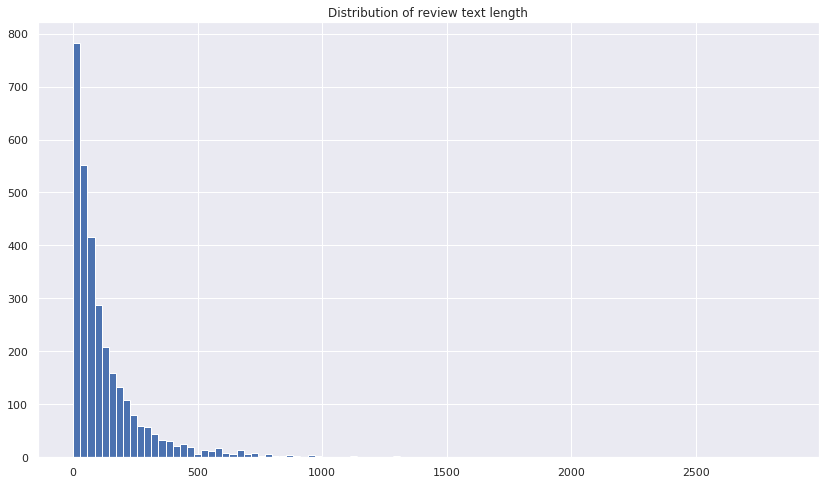

In [0]:
# .hist(bins=200)
plt.hist(dataset['review_text_length'], bins=100)
plt.title('Distribution of review text length')

-	Word Cloud is a visualization technique which counts the number of occurrences of particular data. If the word count is higher than other words, it will come up in the middle with big bold letter. Overall, It is a bird eye view on whole dataset and it provides customers’ sentiments briefly. Please find figure below.

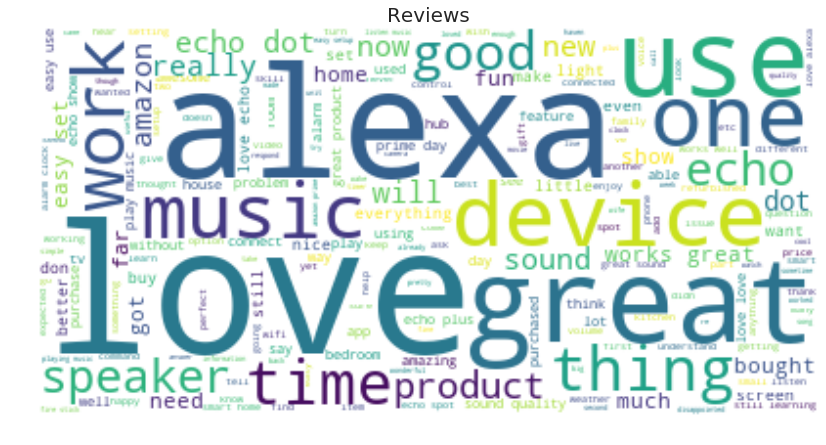

In [0]:
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(dataset['review_cleared_text'].tolist())

wordcloud_fig = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud_fig, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews',size=30)
plt.show()

Text(0.5, 1.0, 'Review count for each product')

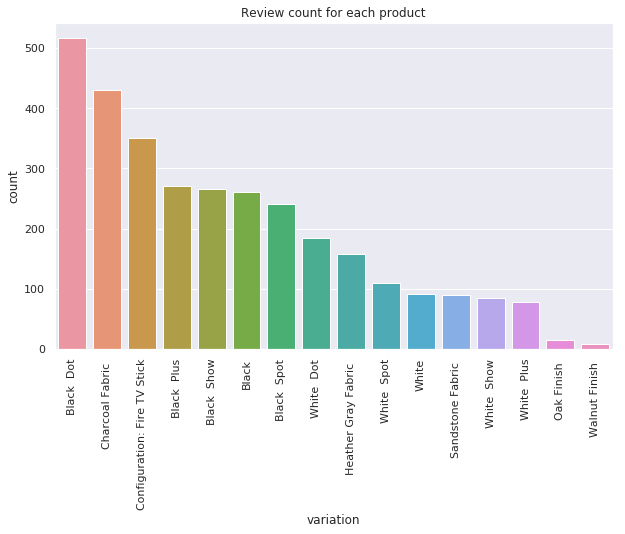

In [0]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(dataset.variation,
              order = dataset['variation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Review count for each product')

Text(0.5, 1.0, 'Rating count')

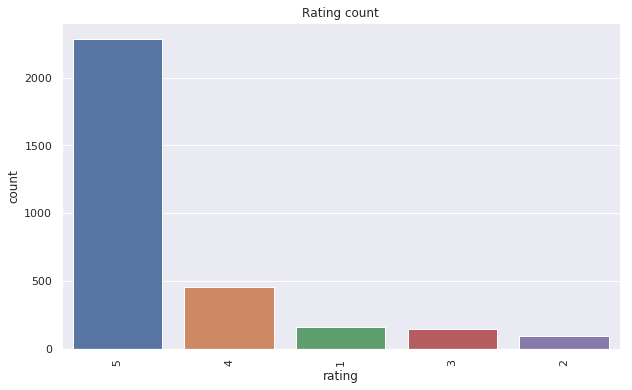

In [0]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(dataset.rating,
            order = dataset['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Rating count')

In [0]:
data5 = dataset[dataset.rating == 5]
data_not_5 = dataset[dataset.rating != 5]
data_1 = dataset[dataset.rating == 1]

The below wordcloud is of the comments which got 5 ratings. 

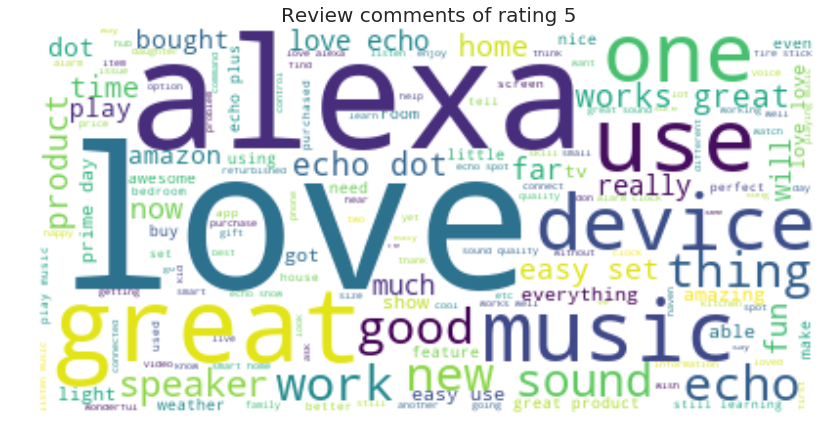

In [0]:
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data5['review_cleared_text'].tolist())

wordcloud_fig_2 = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud_fig_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Review comments of rating 5',size=20)
plt.show()

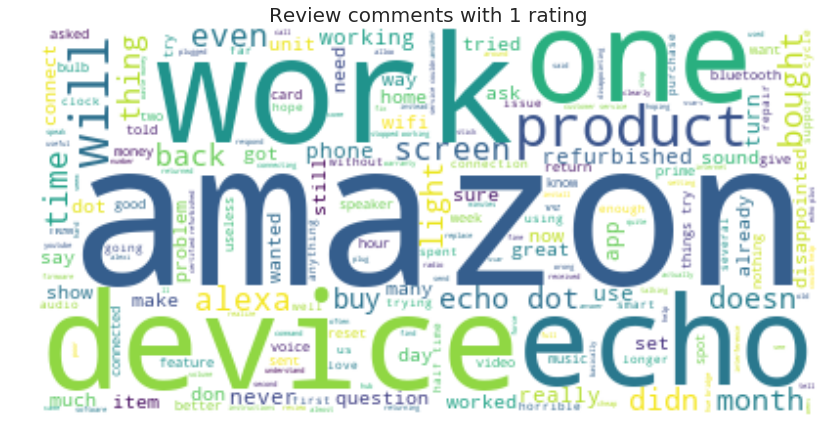

In [0]:
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data_1['review_cleared_text'].tolist())

wordcloud_fig_3 = WordCloud(background_color="white").generate(reviews)
plt.figure()
plt.imshow(wordcloud_fig_3, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Review comments with 1 rating',size=20)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

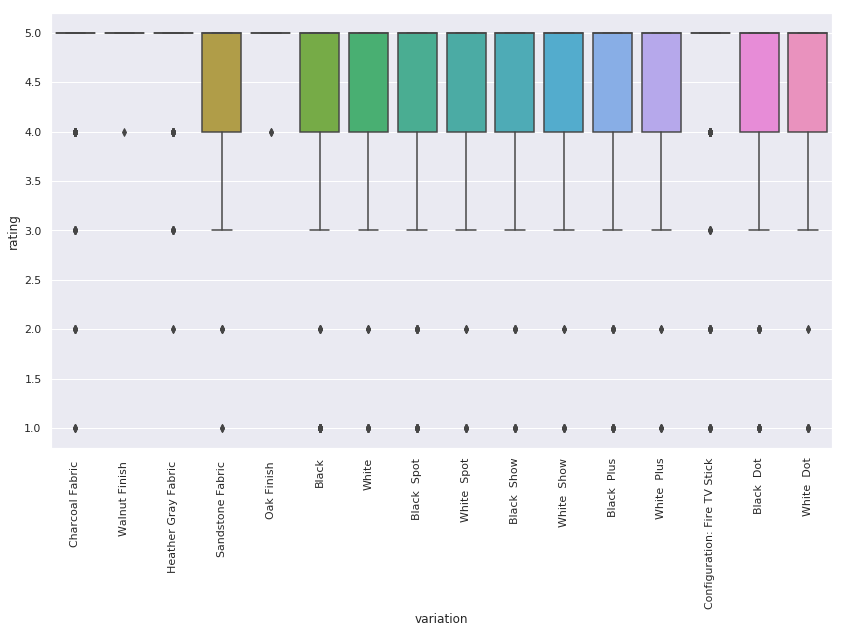

In [0]:
sns.boxplot(dataset.variation, dataset.rating)
plt.xticks(rotation = 90)

Most of the Rating has been given a 5. Therefore, the comments which has given a 5 has considered as positive and comments which has a rating 4 and lower considered as negative.

In [0]:
dataset['positive'] = 0
dataset.loc[dataset['rating'] ==5, 'positive'] = 1

output_label = dataset['positive']

In [0]:
nltk.download('punkt')
nltk.download('stopwords')

#word_tokenize(dataset.verified_reviews[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


In the following, first, the sentences are seperated into items in array to access word by word. Then, the each word is check against stop words and removes it from the array. Then, the sentence array is looped for the stemming process. In stemming process, the suffixes in the word are remove. The word Hearing or heared or hears is converted to hear. Finally, the array is connected as a sentence. 

Following is a example for the process. 

comment "love my echo, playing everyday"

1. Tokenize 

  ["love","my","echo","playing","everyday"]
  
2. Stop words

  ["love","echo","playing","everyday"]
  
3. Stemming

  ["love","echo","play","everyday"]
  
4. Join

  ["love echo play everyday"]

In [0]:


stop_words = set(stopwords.words('english')) 

#Tokenize words
dataset['review_cleared_text'] = dataset.review_cleared_text.apply(lambda x: word_tokenize(x))

#remove stop words 
dataset['review_cleared_text'] = dataset.review_cleared_text.apply(lambda x: [w for w in x if w not in stop_words])

ps = PorterStemmer() 
  
# choose some words to be stemmed 
dataset['review_cleared_text'] = dataset.review_cleared_text.apply(lambda x: [ps.stem(w) for w in x])
 

#append sentence
dataset['review_cleared_text'] = dataset.review_cleared_text.apply(lambda x: ' '.join(x))


In [0]:
dataset.head()

,rating,date,variation,verified_reviews,feedback,review_text_length,review_cleared_text,positive
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometim play game answer question correctli al...,0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing yr old learn dinosaur control li...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,1


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 8 columns):
rating                 3150 non-null int64
date                   3150 non-null object
variation              3150 non-null object
verified_reviews       3150 non-null object
feedback               3150 non-null int64
review_text_length     3150 non-null int64
review_cleared_text    3150 non-null object
positive               3150 non-null int64
dtypes: int64(4), object(4)
memory usage: 197.0+ KB


####Bag of Words

Bag of words is a method that used in natural language processing to convert the text in to numbers. Each word will identify as a unique word and put into a bag. If the same word has occurd in the sentence, the count of the word will be incremented by 1.

Following is an example for Bag of words

---

Lets take two reviews :

1. 'Great speaker, love it. Using the speaker all day'

2. 'We love the echo. Needs a little improvement on sound'


 
 
 Sentences | great | speaker | love | using  | all | day | we | echo | needs | little | improvement | sound
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
S1 | 1 | 2 | 1 | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 0
S2 | 0 | 0 | 1 | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1


This is achieved by CountVectorizer llibrary in scikit learn

In [0]:

bag_of_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# creating bag of words for training bag-of-words feature matrix
bagOfWords = bag_of_word_vectorizer.fit_transform(dataset['review_cleared_text'])
print("bow",bagOfWords)


bow   (0, 522)	1
  (0, 271)	1
  (1, 522)	1
  (2, 824)	1
  (2, 645)	1
  (2, 365)	1
  (2, 37)	2
  (2, 692)	1
  (2, 202)	1
  (2, 25)	1
  (2, 767)	1
  (2, 381)	1
  (2, 992)	1
  (2, 501)	1
  (2, 1)	1
  (2, 925)	1
  (2, 499)	1
  (2, 71)	1
  (2, 418)	1
  (3, 645)	2
  (3, 365)	1
  (3, 501)	1
  (3, 499)	1
  (3, 519)	1
  (3, 360)	1
  :	:
  (3148, 894)	1
  (3148, 832)	1
  (3148, 563)	1
  (3148, 36)	1
  (3148, 836)	1
  (3148, 941)	1
  (3148, 388)	1
  (3148, 529)	1
  (3148, 206)	1
  (3148, 808)	1
  (3148, 174)	1
  (3148, 871)	1
  (3148, 690)	2
  (3148, 356)	1
  (3148, 262)	2
  (3148, 421)	2
  (3148, 475)	1
  (3148, 181)	1
  (3148, 558)	1
  (3148, 62)	1
  (3148, 488)	1
  (3148, 855)	1
  (3148, 107)	1
  (3148, 546)	1
  (3149, 379)	1


In [0]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# # TF-IDF feature matrix
# tfidf = tfidf_vectorizer.fit_transform(dataset['review_clear'])
# print("tfidf",tfidf)


##CLASSIFIER

We have split the Dataset in 67% and 33% ratio to use it for training and testing purposes. Here we have examined four classifiers:


1.   Logistic Regression
2.   XGB Regression
3.   Multinomial Naive Byes
4.   Support Vector Machine

The code for the classifier has already been attached in the report. We will analyze the accuracy and find out the best classifier for the dataset.



In [0]:
data_train_set_1, data_test_set_1, output_label_train_1, output_label_test_1 = train_test_split(bagOfWords, output_label, test_size=0.33
                                    ,random_state=53)

##Logistic Regression

Like other regression technique, the logistic regression is used for predictive analysis.  LR is used to describe data and to explain the relationship between one binary variable and one or more ratio-level, nominal, interval ordinal or independent variables.

In the code 

In [0]:
# splitting data into training and validation set
trainer_model_data, test_model_data, label_train_data, label_test_data = train_test_split(data_train_set_1, output_label_train_1, random_state=42, test_size=0.3)

logicticReg = LogisticRegression()
logicticReg.fit(trainer_model_data, label_train_data) # training the model

logicticReg_prediction = logicticReg.predict_proba(test_model_data) # predicting on the validation set
logicticReg_prediction_int = logicticReg_prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
logicticReg_prediction_int = logicticReg_prediction_int.astype(np.int)

f1_score(label_test_data, logicticReg_prediction_int) # calculating f1 score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8805394990366089

In [0]:
test_pred = lreg.predict_proba(data_test_set_1)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
#dataset['positive'] = test_pred_int
#submission = test[['id','positive']]


score = accuracy_score(output_label_test_1, test_pred_int)
print('Accuracy is:',score)
f1 = f1_score(output_label_test_1, test_pred_int)
print('F score is:',f1)

Accuracy is: 0.6701923076923076
F score is: 0.7894413750767342


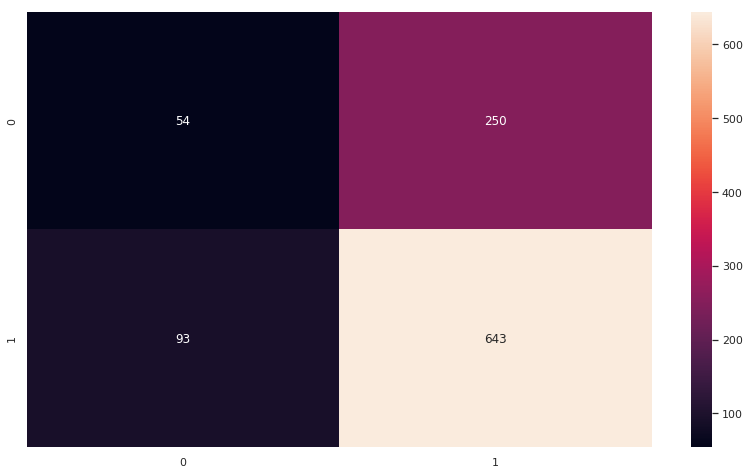

In [0]:
sns.heatmap(confusion_matrix(output_label_test_1,test_pred_int), annot=True,fmt='2.0f')

In [0]:
xg_reg = xgb.XGBRegressor()

xg_reg.fit(trainer_model_data, label_train_data)

xg_preds = xg_reg.predict(test_model_data)

eval_predictions = [round(value) for value in xg_preds]
# evaluate predictions
accuracy = accuracy_score(label_test_data, eval_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


[09:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy: 77.25%


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/

In [0]:
clf = MultinomialNB()
clf.fit(trainer_model_data, label_train_data)
nb_preds = clf.predict(test_model_data)
f1_score(label_test_data, nb_preds)

0.8857715430861723

In [0]:
clf = svm.SVC(gamma='scale')
clf.fit(trainer_model_data, label_train_data)  
svm_predict = clf.predict(test_model_data)

f1_score(label_test_data, svm_predict)

0.8793103448275862

## Analysis using Lexicon and Rule Based

Import Lexcion Library 'vaderSentiment'
(https://github.com/cjhutto/vaderSentiment)

In [0]:
!pip install vaderSentiment


     |████████████████████████████████| 133kB 2.8MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


Defining Score method

In [0]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

Calcualting score for review comment

In [0]:
x = []
y = []

for review_comment in dataset.review_clear:
  item = sentiment_analyzer_scores(review_comment)
  
  x.append(item['neg'])
  y.append(item['pos'])


Plot Analysis result

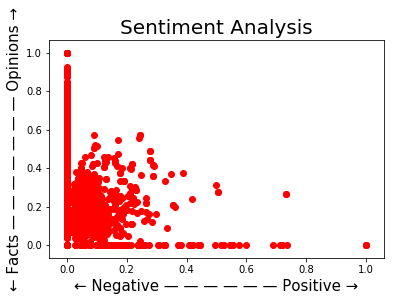

In [0]:
plt.scatter(x, y, color='Red')
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

Github URL : https://github.com/lahirurane/UTS_ML2019_A2/blob/master/UTS_ML2019_A2_.ipynb